In [1]:
# Import Libraries
import sys
import glob, os

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.measure
import skimage.measure

In [2]:
# Setup paths and import local libraries
%cd ../../

prj_path = Path('SkyAI-Sim')
sys.path.insert(0, str(prj_path))
from src.utils import img_helper
from src.utils.io_helper import str_to_floats
from src.utils import consts
from src.data.skyai import SkyAI

args = consts.ARGS
args

/home/sdjkhosh/Projects/SkyAI-Sim


usage: SkyAI Sim Project [-h] [--coords COORDS] [--fov FOV]
                         [--aspect_ratio ASPECT_RATIO [ASPECT_RATIO ...]]
                         [--overlap OVERLAP] [--utm UTM] [--data_dir DATA_DIR]
                         [--vmargin VMARGIN]
                         [--img_size IMG_SIZE [IMG_SIZE ...]]
                         [--batch_size BATCH_SIZE] [--seed SEED]
SkyAI Sim Project: error: argument --fov: invalid float value: '/home/sdjkhosh/.local/share/jupyter/runtime/kernel-v2-1771874f3Ehbhd4sFdI.json'
2024-07-24 18:07:21.493546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-24 18:07:22.484163: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic l

Namespace(coords=[35.16, -89.9, 35.115, -89.823, 400.0], fov=78.8, aspect_ratio=[4, 3], overlap=0, utm='EPSG:32616', data_dir='dataset/Memphis/', vmargin=0, img_size=[400, 400, 3], batch_size=8, seed=2024)

In [3]:
args.coords =  str_to_floats("35.16_-89.9_35.115_-89.823_400.0")
args.data_dir = "dataset/Memphis/"
aerial_data = SkyAI(
        args=args,
        map_type='roadmap',
        data_dir=args.data_dir,
        overlap=args.overlap
        )
aerial_data.config(download_raster=False)


2024-07-24 18:07:23.438562: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-07-24 18:07:23.438628: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: c2-parisa
2024-07-24 18:07:23.438638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: c2-parisa
2024-07-24 18:07:23.438803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.54.0
2024-07-24 18:07:23.438835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.54.0
2024-07-24 18:07:23.438843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.54.0
2024-07-24 18:07:23.439435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAP

Namespace(coords=[35.16, -89.9, 35.115, -89.823, 400.0], fov=78.8, aspect_ratio=[4, 3], overlap=0, utm='EPSG:32616', data_dir='dataset/Memphis/', vmargin=0, img_size=[400, 400, 3], batch_size=8, seed=2024)
Checking folder:
	 dataset/Memphis/roadmap_0 Folder Exists.

--------------------------------------------------------------

Data detailed values before download:

--------------------------------------------------------------
namespace(args={'coords': [35.16, -89.9, 35.115, -89.823, 400.0],
                'fov': 78.8,
                'aspect_ratio': [4, 3],
                'overlap': 0,
                'utm': 'EPSG:32616',
                'data_dir': 'dataset/Memphis/',
                'vmargin': 0,
                'img_size': [400, 400, 3],
                'batch_size': 8,
                'seed': 2024},
          filename='log_2024-07-24_18-07-23.txt',
          top_left=namespace(lat=35.16,
                             lon=-89.9,
                             x_utm=235848.057,
   

1.920503896206502


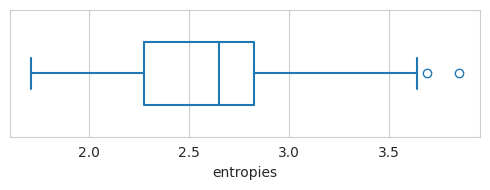

In [9]:
plt.rcParams["figure.figsize"] = [5, 2]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
sns.boxplot(aerial_data.meta_df, x='entropies', width=0.5, orient='h', fill=False, dodge=False)
print(aerial_data.meta_df['entropies'].quantile(0.1))
# plt.yticks(np.arange(1, 5, 0.1))

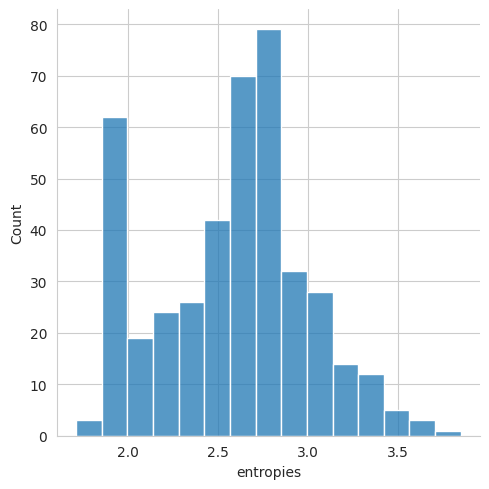

In [10]:
plt.rcParams["figure.figsize"] = [5, 5.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
sns.displot(data=aerial_data.meta_df, x='entropies')
# plt.yticks(np.arange(1, 5, 0.1))

In [11]:
nx = 5
ny = 4
seed = 4

420
3


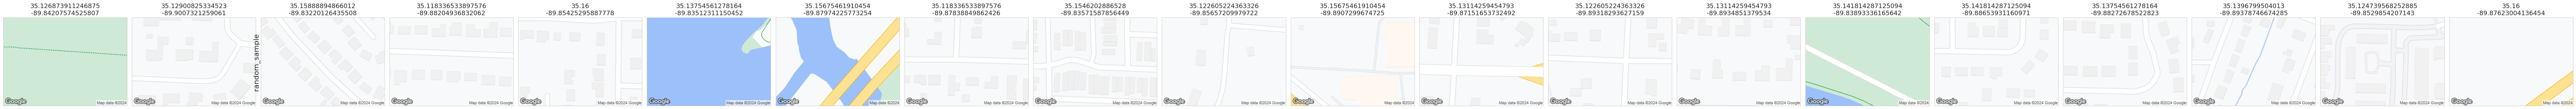

In [12]:
aerial_imgs_path = glob.glob(os.path.join(aerial_data.data_dir / aerial_data.data_info['x'], "*.jpg"))
aerial_imgs_path.sort()
print(len(aerial_imgs_path))
aerial_imgs, aerial_titles = img_helper.choose_random_images(nx*ny,
                                                            aerial_imgs_path,
                                                            output_dir=aerial_data.data_dir / 'random_sample',
                                                            obj=aerial_data,
                                                            seed=seed)

3


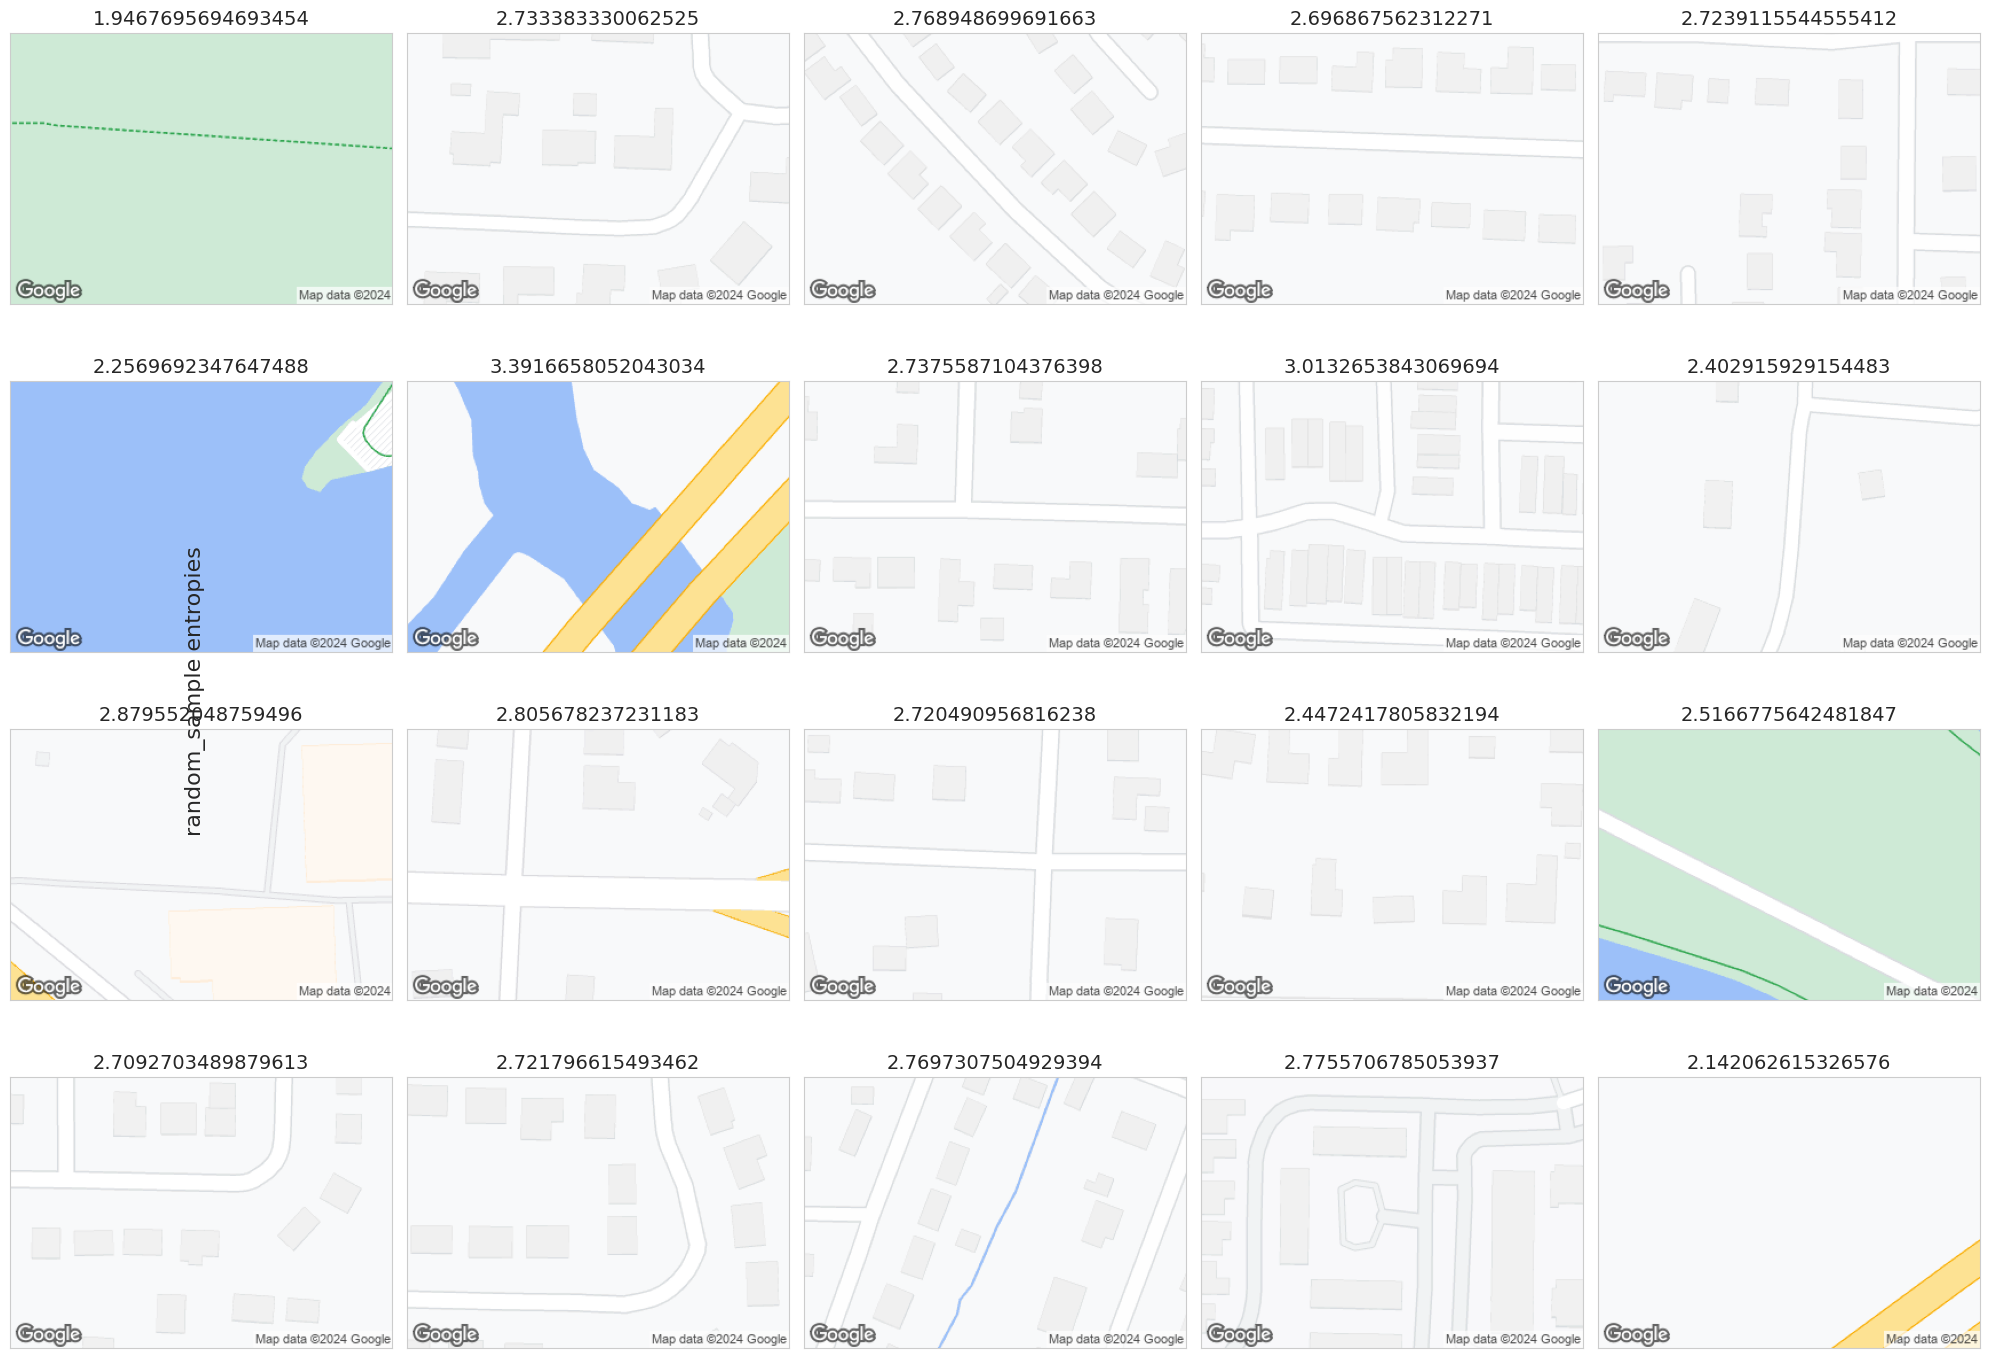

In [8]:
entropys = [skimage.measure.shannon_entropy(img) for img in aerial_imgs]

img_helper.plot_multy(
    aerial_imgs,
    aerial_data.data_dir /'random_sample entropies',
    nx, ny, entropys)